In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import scipy.io
import os
import time

In [29]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Load dataset ===
df = pd.read_csv('dataset_with_start_end.csv')

# === Feature and target separation ===
X = df[['Bandgap_Number', 'Start_Frequency', 'End_Frequency']]
y = df['Angle']

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Train XGBoost Regressor ===
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predict on test set ===
y_pred = model.predict(X_test)

# === Evaluation Metrics ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# === Save the model ===
joblib.dump(model, 'xgb_angle_model.pkl')




Mean Squared Error (MSE): 21.3909
R² Score: 0.8913


['xgb_angle_model.pkl']

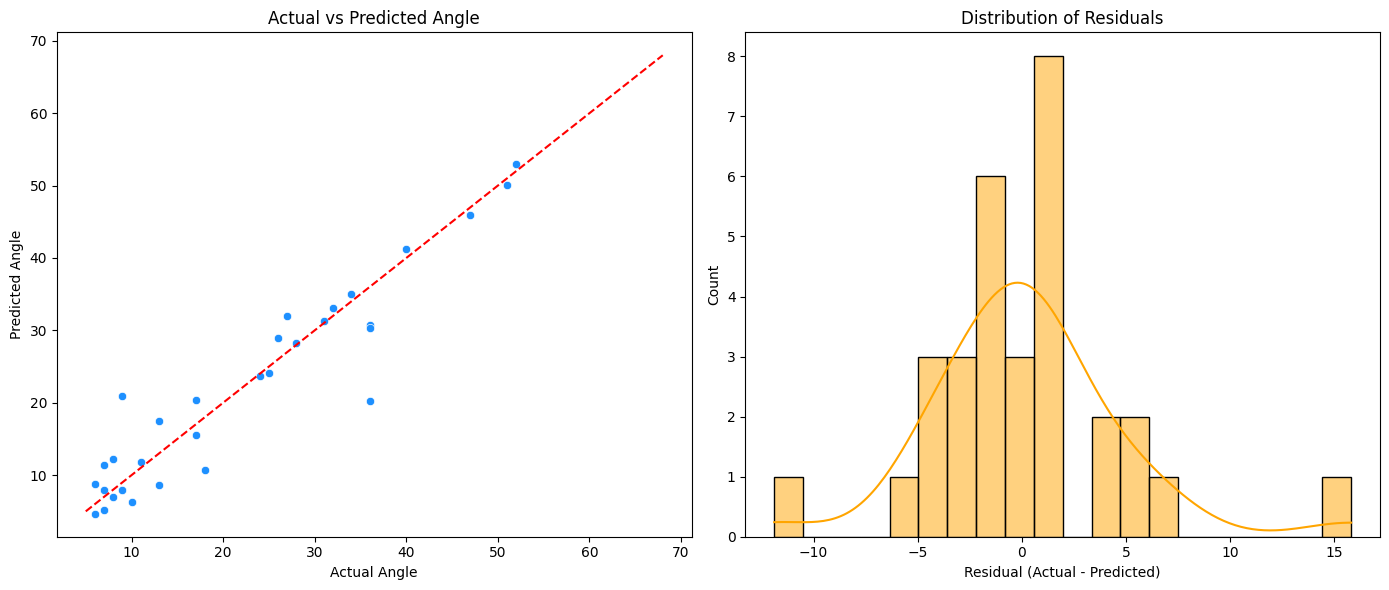

In [30]:
# === PLOTS FOR PRESENTATION ===
plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted Angle")

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("angle_prediction_results.png")  # You can use this in your PPT
plt.show()



In [31]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load('xgb_angle_model.pkl')


# We can replace these values with your desired input
bandgap_number = 2.0
start_freq = 3.462677
end_freq = 3.636049

# Prepared input as a 2D array
input_data = np.array([[bandgap_number, start_freq, end_freq]])

# Predicted angle
predicted_angle = model.predict(input_data)

print(f"Predicted Angle: {predicted_angle[0]:.4f}")


Predicted Angle: 5.0503


In [32]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Load dataset ===
df = pd.read_csv('dataset_with_start_end.csv')  # Ensure this file contains required columns

# === Feature and target separation (Only 2 inputs) ===
X = df[['Start_Frequency', 'End_Frequency']]
y = df['Angle']

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Train XGBoost Regressor ===
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === Predict on test set ===
y_pred = model.predict(X_test)

# === Evaluation Metrics ===
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# === Save the model ===
joblib.dump(model, 'xgb_angle_model_start_end_only.pkl')
print("✅ Model saved as 'xgb_angle_model_start_end_only.pkl'")




Mean Squared Error (MSE): 137.6399
R² Score: 0.3006
✅ Model saved as 'xgb_angle_model_start_end_only.pkl'


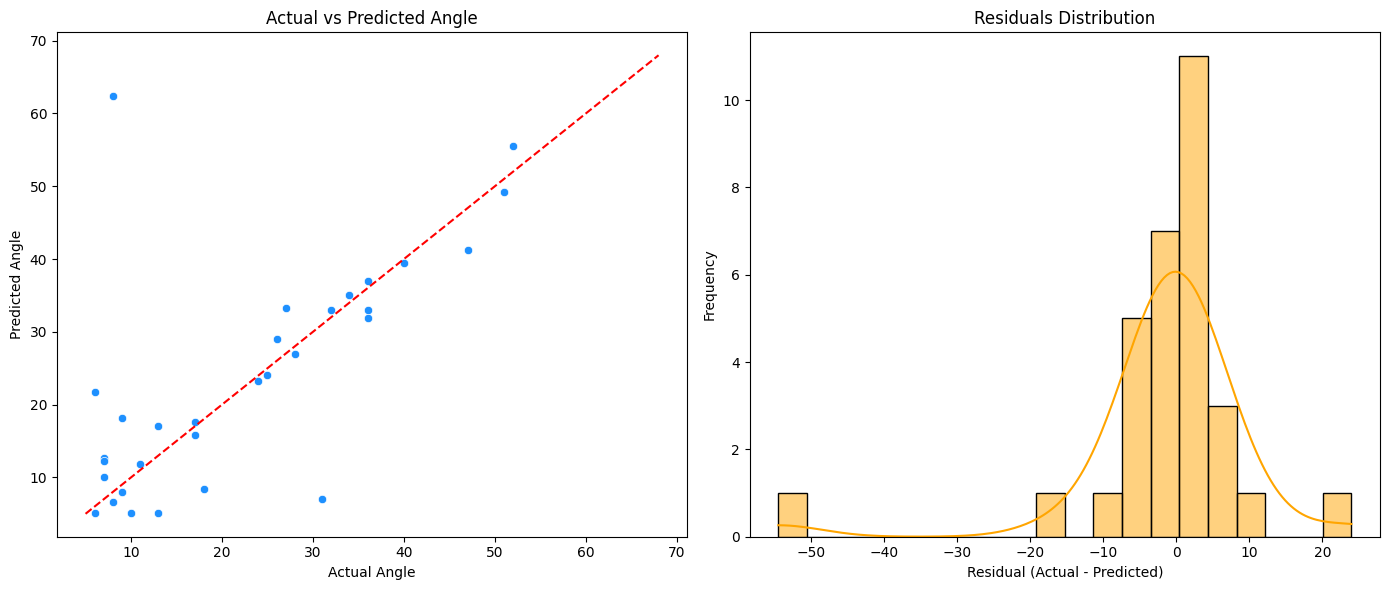

In [33]:
# === Plotting Results ===
plt.figure(figsize=(14, 6))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Angle")
plt.ylabel("Predicted Angle")
plt.title("Actual vs Predicted Angle")

# Plot 2: Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("angle_prediction_start_end_only.png")
plt.show()


In [1]:
# === Predict Angle from New Start & End Frequencies ===
# You can replace these with any values
start_freq = 3.4627
end_freq = 3.6360

# Prepare input
input_data = np.array([[start_freq, end_freq]])

# Load model and predict
loaded_model = joblib.load('xgb_angle_model_start_end_only.pkl')
predicted_angle = loaded_model.predict(input_data)

print(f"\n Predicted Angle for Start_Frequency = {start_freq:.4f} and End_Frequency = {end_freq:.4f} → {predicted_angle[0]:.4f} degrees")


NameError: name 'np' is not defined